In [1]:
import re
import pandas as pd
import numpy as np
import preprocessor as p
import sys
sys.path.append("/Library/Python/2.7/site-packages")
from wordcloud import WordCloud
from nltk.probability import FreqDist, ConditionalFreqDist
from textblob import TextBlob   
import nltk
import string
from tqdm import tqdm
from nltk import ngrams
pd.set_option('display.max_colwidth', -1)

In [2]:
f = open("tweets_1.txt")

In [3]:
data = f.readlines()
clean_data = []
for line in data:
    if line[:2] == "79":
        clean_data.append(line.strip())
    else:
        temp = clean_data[-1] + " " +  line.strip()
        clean_data[-1]  = temp

In [4]:
df = []
for tweet in clean_data:
    try:
        if tweet[:2] == "79":
            df.append({'tweet_id': tweet[:18], 'text': tweet[19:]})
    except:
        pass

df = pd.DataFrame(df)
df.head()

,text,tweet_id
0,I voted early in #maryland . I voted for @ChrisVanHollen for the #Senate . Vote on Tuesday. Don't forget the… https://t.co/aDeosi0REt,795861704592789504
1,"#PREZ of #senate #SHALL in #PRESENCE of #HOUSEand #SENATE,open #ALLCERTIFICATES and #VOTES #SHALL THEN stand up and #BECOUNTED person HAVING",795865532578795520
2,"#WakeUpAmerica,#Trump2016,#Veterans,#Hialeah,#Miami,#MakeAmericaGreatAgain,#tcot,#MAGA,#SENATE,#NYT,#Cuba,#BREXIT,… https://t.co/yLnWLgrqfO",795897456366092292
3,Hat-tip to #PeterRobinson for adding my #Senate take to @Ricochet. Join the site -- best investment you'll make. https://t.co/8TSSZe5UjX,795850304956661760
4,We should learn from the past and prepare for the future. #TheUnofficialGazette #Bills #Laws #Senate... https://t.co/W0giKl4uPd,795898663830745088


In [5]:
all_hashtags = {}
def get_hashtags(tweet):
    parsed_tweet = p.parse(tweet.decode('ascii', 'ignore').encode('ascii').lower())
    parsed_hashtags = parsed_tweet.hashtags
    
    hashtags = []
    if parsed_hashtags is not None:
        for hashtag in parsed_hashtags:
            temp = hashtag.match[1:].lower()
            if temp in all_hashtags:
                all_hashtags[temp] += 1
            else:
                all_hashtags[temp] = 1
            hashtags.append(temp)

    hashtags_str = (" ").join(hashtags)
    return hashtags_str, len(hashtags)


def get_clean_tweet(tweet):
    p.set_options(p.OPT.URL, p.OPT.EMOJI)
    clean_tweet = p.clean(tweet)
    return clean_tweet

In [6]:
df['hashtags'], df['length'] = zip(*df['text'].map(get_hashtags)) 
df['tweet'] = df['text'].map(get_clean_tweet)
df = df.drop_duplicates("text")

In [7]:
df.head()

,text,tweet_id,hashtags,length,tweet
0,I voted early in #maryland . I voted for @ChrisVanHollen for the #Senate . Vote on Tuesday. Don't forget the… https://t.co/aDeosi0REt,795861704592789504,maryland senate,2,I voted early in #maryland . I voted for @ChrisVanHollen for the #Senate . Vote on Tuesday. Don't forget the…
1,"#PREZ of #senate #SHALL in #PRESENCE of #HOUSEand #SENATE,open #ALLCERTIFICATES and #VOTES #SHALL THEN stand up and #BECOUNTED person HAVING",795865532578795520,prez senate shall presence houseand senate allcertificates votes shall becounted,10,"#PREZ of #senate #SHALL in #PRESENCE of #HOUSEand #SENATE,open #ALLCERTIFICATES and #VOTES #SHALL THEN stand up and #BECOUNTED person HAVING"
2,"#WakeUpAmerica,#Trump2016,#Veterans,#Hialeah,#Miami,#MakeAmericaGreatAgain,#tcot,#MAGA,#SENATE,#NYT,#Cuba,#BREXIT,… https://t.co/yLnWLgrqfO",795897456366092292,wakeupamerica trump2016 veterans hialeah miami makeamericagreatagain tcot maga senate nyt cuba brexit,12,"#WakeUpAmerica,#Trump2016,#Veterans,#Hialeah,#Miami,#MakeAmericaGreatAgain,#tcot,#MAGA,#SENATE,#NYT,#Cuba,#BREXIT,…"
3,Hat-tip to #PeterRobinson for adding my #Senate take to @Ricochet. Join the site -- best investment you'll make. https://t.co/8TSSZe5UjX,795850304956661760,peterrobinson senate,2,Hat-tip to #PeterRobinson for adding my #Senate take to @Ricochet. Join the site -- best investment you'll make.
4,We should learn from the past and prepare for the future. #TheUnofficialGazette #Bills #Laws #Senate... https://t.co/W0giKl4uPd,795898663830745088,theunofficialgazette bills laws senate,4,We should learn from the past and prepare for the future. #TheUnofficialGazette #Bills #Laws #Senate... d


Wordcloud for all the secondary hashtags

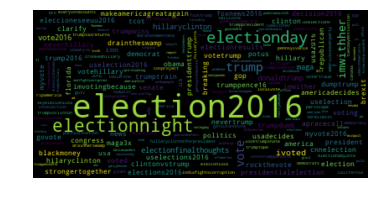

In [8]:
wc = WordCloud().generate_from_frequencies(all_hashtags)

import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# concepts = pd.DataFrame(all_hashtags.items(), columns=['topic', 'n'])
concept_dict = {}
for k, d in enumerate(all_hashtags):
    concept_dict[d] = k

In [10]:
tweets = df['tweet'].tolist()
print('# of tweets:', len(tweets))
for tweet in tweets[:5]:
    print(tweet)

('# of tweets:', 717005)
I voted early in #maryland . I voted for @ChrisVanHollen for the #Senate . Vote on Tuesday. Don't forget the…
#PREZ of #senate #SHALL in #PRESENCE of #HOUSEand #SENATE,open #ALLCERTIFICATES and #VOTES #SHALL THEN stand up and #BECOUNTED person HAVING
#WakeUpAmerica,#Trump2016,#Veterans,#Hialeah,#Miami,#MakeAmericaGreatAgain,#tcot,#MAGA,#SENATE,#NYT,#Cuba,#BREXIT,…
Hat-tip to #PeterRobinson for adding my #Senate take to @Ricochet. Join the site -- best investment you'll make.
We should learn from the past and prepare for the future. #TheUnofficialGazette #Bills #Laws #Senate... d


Create hashtags based term document matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

tweet_hashtags = df['hashtags'].tolist()
vectorizer = TfidfVectorizer(max_features = 20000, use_idf=False)
tf_vectors = vectorizer.fit_transform(tweet_hashtags)

svd = TruncatedSVD(n_components=50, random_state=0)
svd_tf_vectors = svd.fit_transform(tf_vectors)

Load glove vectors, tokenize tweets 

In [ ]:
import numpy as np
print("loading glove model...")
embedding_size = 100
glove_file = 'glove.twitter.27B.100d.txt'
glove = {}
with open(glove_file) as f:
    for line in f.readlines():
        line = line.replace("\n","").split(" ")
        glove[line[0]] = np.array(line[1:],dtype='float64')

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

def tweetVector(tweet):
    words = tknzr.tokenize(tweet.lower().replace("#"," "))                       
    l = float(len(tweet) | 1)
    sum = np.zeros(embedding_size)
    for word in tweet:
        sum += glove.get(word, np.zeros(embedding_size))
    return sum/l

In [ ]:
tweet_vectors = []
for i in range(25000):
    tweet_vectors.append(tweetVector(tweets[i]))

In [ ]:
tweet_vectors = np.array(tweet_vectors)

Use Denoising AutoEncoders to create representation vectors

In [ ]:
from DenoisingAutoencoder import DenoisingAutoencoder
from StackedDenoisingAutoencoders import StackedDenoisingAutoencoders

da = DenoisingAutoencoder(n_hidden=400, verbose=True, training_epochs=5)
da.fit(tweet_vectors)

In [ ]:
tweet_vectors = da.transform_latent_representation(tweet_vectors)

KMeans Clustering

In [ ]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 20
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(doc_topic)
kmeans_clusters = kmeans.predict(doc_topic)
kmeans_distances = kmeans.transform(doc_topic)

for i, tweet in enumerate(tweets):
    if(i < 15):
        print("Cluster " + str(kmeans_clusters[i]) + ": " + tweet + "(distance: " + str(kmeans_distances[i][kmeans_clusters[i]]) + ")")

Calculating Collocations

In [ ]:
def get_score(bigram, wfd, bfd, n_xx):
    n_ix = wfd[bigram[0]]
    n_xi = wfd[bigram[1]]
    n_ii = bfd[bigram]
    n_oi = n_xi - n_ii
    n_io = n_ix - n_ii
    n_oo = n_xx - n_ii - n_oi - n_io
    score = (float(n_ii*n_oo - n_io*n_oi)**2 /
                ((n_ii + n_io) * (n_ii + n_oi) * (n_io + n_oo) * (n_oi + n_oo)))
    return score

tknzr = nltk.TweetTokenizer()

wfd = FreqDist()
bfd = FreqDist()
stopwords = nltk.corpus.stopwords.words('english')

for i in tqdm(range(len(tweets))):
    tweet = "".join(l for l in tweets[i] if l not in string.punctuation)
    data_tokens = (tknzr.tokenize(tweet.lower()))
    tokens = [w for w in data_tokens if w.lower() not in stopwords]

    for window in ngrams(tokens, 2, pad_right=True):
        w1 = window[0]
        if w1 is None:
            continue
        wfd[w1] += 1
        for w2 in window[1:]:
            if w2 is not None:
                bfd[(w1, w2)] += 1
            
after_filter_bigrams = FreqDist()
for words, freq in bfd.iteritems():
    if not (freq < 3):
        after_filter_bigrams[words] = freq

score_FD = FreqDist()
for bigram in  after_filter_bigrams:
    score_FD[bigram] = get_score(bigram, wfd, after_filter_bigrams, after_filter_bigrams.N())

In [ ]:
def compute_distance(w1, w2):
    if(w1, w2) in score_FD:
        return score_FD[(w1, w2)]

words = all_hashtags.keys()
words = np.asarray(words) #So that indexing with a list will work
lev_similarity = -1*np.array([[compute_distance(w1,w2) for w1 in words] for w2 in words])

Create Skip vectors

In [ ]:
sys.path.append("skip-thoughts")
import skipthoughts
import numpy as np

model = skipthoughts.load_model()
encoder = skipthoughts.Encoder(model)
skip_vectors = []

for tweet in tweets:    
    try:
        tweet = tweet.decode('ascii', 'ignore').encode('ascii').lower()
        skip_vectors.append(encoder.encode(tweet, verbose=0))
    except:
        skip_vectors.append(np.zeros(4800))

Clustering 

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score
import rcc
clusterer = rcc.RccCluster(measure='cosine')

P = clusterer.fit(doc_topic)

LDA

In [11]:
import lda
from sklearn.feature_extraction.text import CountVectorizer
from wordsegment import load, segment
load()

segmented_tweets = []
for tweet in tweets:
    words = []
    for word in tweet.lower().replace("#"," ").split(" "):
        words.append((" ").join(segment(word)))
    segmented_tweets.append((" ").join(words))

In [18]:
cvectorizer = CountVectorizer(min_df=4, max_features=10000, stop_words='english')
cvz = cvectorizer.fit_transform(tweets[:50000])

n_topics = 20
n_iter = 2000
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)
X_topics = lda_model.fit_transform(cvz)

INFO:lda:n_documents: 50000
INFO:lda:vocab_size: 9164
INFO:lda:n_words: 391103
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -4653651
INFO:lda:<10> log likelihood: -3297782
INFO:lda:<20> log likelihood: -3125106
INFO:lda:<30> log likelihood: -3065232
INFO:lda:<40> log likelihood: -3032527
INFO:lda:<50> log likelihood: -3011178
INFO:lda:<60> log likelihood: -2998309
INFO:lda:<70> log likelihood: -2988249
INFO:lda:<80> log likelihood: -2982124
INFO:lda:<90> log likelihood: -2977804
INFO:lda:<100> log likelihood: -2972970
INFO:lda:<110> log likelihood: -2969893
INFO:lda:<120> log likelihood: -2966638
INFO:lda:<130> log likelihood: -2964839
INFO:lda:<140> log likelihood: -2963783
INFO:lda:<150> log likelihood: -2962089
INFO:lda:<160> log likelihood: -2960349
INFO:lda:<170> log likelihood: -2958314
INFO:lda:<180> log likelihood: -2957541
INFO:lda:<190> log likelihood: -2957245
INFO:lda:<200> log likelihood: -2955665
INFO:lda:<210> log likelihood: -2953909
INFO:lda

INFO:lda:<1990> log likelihood: -2933848
INFO:lda:<1999> log likelihood: -2933119


In [19]:
n_top_words = 8
topic_summaries = []

topic_word = lda_model.topic_word_  # get the topic words
vocab = cvectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: congress republican trump court supreme president gop senate
Topic 1: congress trump wins hope vote president hillary win
Topic 2: congress election power president democrats checks executive balances
Topic 3: senate congress house republicans control gop electionnight win
Topic 4: congress hai ki ne modi ke ka hi
Topic 5: congress fbi hillary amp clinton comey federal charge
Topic 6: congress join rs 500 drainherswamp 1000 notes amp
Topic 7: congress vote state senate don president voting just
Topic 8: congress president people don just laws power really
Topic 9: congress trump shit like won let republican pass
Topic 10: congress wins senate term republican clinton new election
Topic 11: congress amp just like got did know ve
Topic 12: congress president war gandhi rahul help need sign
Topic 13: congress good great thank new member god amp
Topic 14: congress money black party blackmoney modi indiafightscorruption amp
Topic 15: congress mt control cosproject termlimits pjnet g

In [20]:
doc_topic = lda_model.doc_topic_
clusters = [doc_topic[i].argmax() for i in range(len(doc_topic))]

In [22]:
new_df = df[['tweet','tweet_id']][:50000]
new_df["clusters"] = clusters

In [23]:
new_df.to_pickle("data_clusters_50000.pkl")

Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(tweet):
    ss = sid.polarity_scores(tweet)
    return ss["pos"], ss["neg"], ss["neu"]

df['pos_score'], df['neg_score'], df['neu_score'] = zip(*df['text'].map(get_sentiment_score)) 
df.head()

In [ ]:
from langdetect import detect

def language_detect(tweet):
    return detect(tweet)

df['lang'] = df[df['tweet'].str.len() > 3]['tweet'].map(language_detect)